In [5]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
    

# KNN Regression(회귀)

### 생선의 길이를 사용하여 무게를 예측

In [3]:
# Data
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

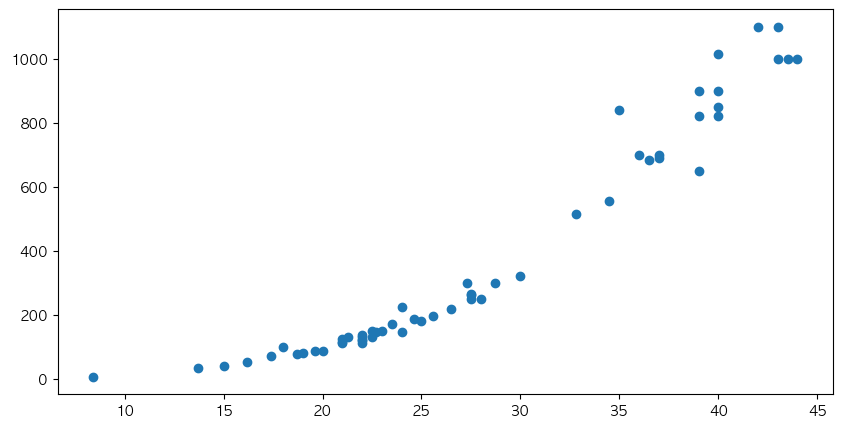

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(
    fish_length, 
    fish_weight,#< target
    )
plt.show()

### Train과 Test 분리

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_length, fish_weight, random_state=42)

In [11]:
print(train_input.shape, test_input.shape)

(42,) (14,)


(42,) (14,) << 이렇게 놓으면 sckit이 못알아먹음 

In [12]:
train_input # << list 

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [13]:
# 1열로 구성된 배열로 재 구성해야 됨
train_input = train_input.reshape(-1, 1) # 행은 -1 있는거 다 쓰고, 열은 1개 만듦
test_input = test_input.reshape(-1, 1) 

In [18]:
print(test_input.shape), train_input.shape
print('-' * 10)
print(test_input)

(14, 1)
----------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


### 회귀모델 사용

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [20]:
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

평균 절대값 오차 : 결정계수(R^2)
    : 오차값이 적을수록 좋은거임 (위에 0.9928만 믿는거 아님)

R**2 = 1 - ( (target - 예측)^2의 합 / (target - mean)^2의 합 )

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
test_prediction = knr.predict(test_input)
mea = mean_absolute_error(test_target , test_prediction)
mea # = 19.157142857142862

# 오차가 19정도 된다는 얘기임, 19는 데이터가 어떤 거냐에 따라 큰 수인지 작은 수 인지가 달라 질 수 있음.
# 이번 데이터는 무게를 구하는거였고 최대 1100 정도 까지 있는 중에 19의 오차는 큰 차이는 아니라는 결론 


19.157142857142862

### 과대적합(overfitting)과 과소적합(underfitting)

In [23]:
# train
knr.score(train_input, train_target)

0.9698823289099254

In [24]:
# test
knr.score(test_input, test_target)

0.992809406101064

train 보다 test의 점수가 잘 나왔으므로 과소적합이 발생하였다.    
보통은 train 점수가 test이 점수보다 조금 더 잘 나온 과대적합을 기준으로 삼는다.

### KNN의 Hyper Parameter를 조절
dafault : 5 -> 3 

In [25]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print("train Score :", knr.score(train_input, train_target))
print("test Score :", knr.score(test_input, test_target))

train Score : 0.9804899950518966
test Score : 0.9746459963987609


In [26]:
knr.n_neighbors = 7
knr.fit(train_input, train_target)
print("train Score :", knr.score(train_input, train_target))
print("test Score :", knr.score(test_input, test_target))

train Score : 0.9761170732051527
test Score : 0.9781383949643516


In [27]:
knr.n_neighbors = 13
knr.fit(train_input, train_target)
print("train Score :", knr.score(train_input, train_target))
print("test Score :", knr.score(test_input, test_target))

train Score : 0.9413423450130075
test Score : 0.9639044643206888


> 이웃의 갯수를 줄이면 과대적합으로 되고, 이웃의 갯수를 늘리면 과소적합으로 구성이 됨

### 이웃의 갯수 조절로 확인

K ===> 1
Train Score : 0.9852830341215901
Test  Score : 0.991309195814175
----------------------------------------


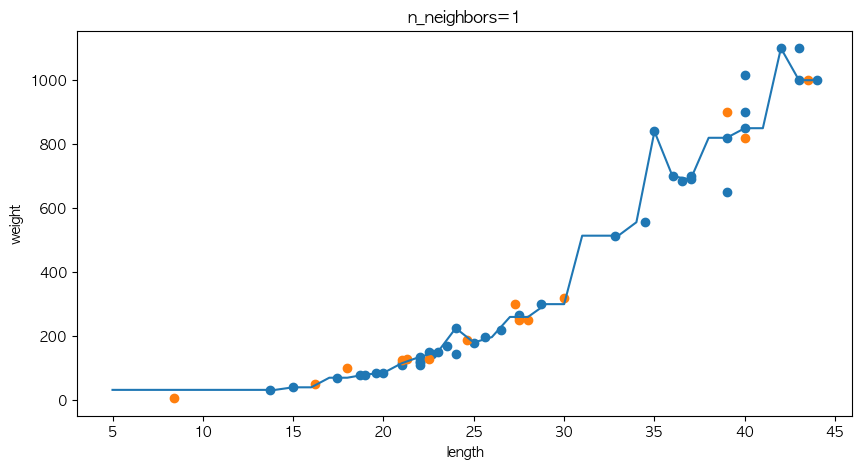

K ===> 3
Train Score : 0.9804899950518966
Test  Score : 0.9746459963987609
----------------------------------------


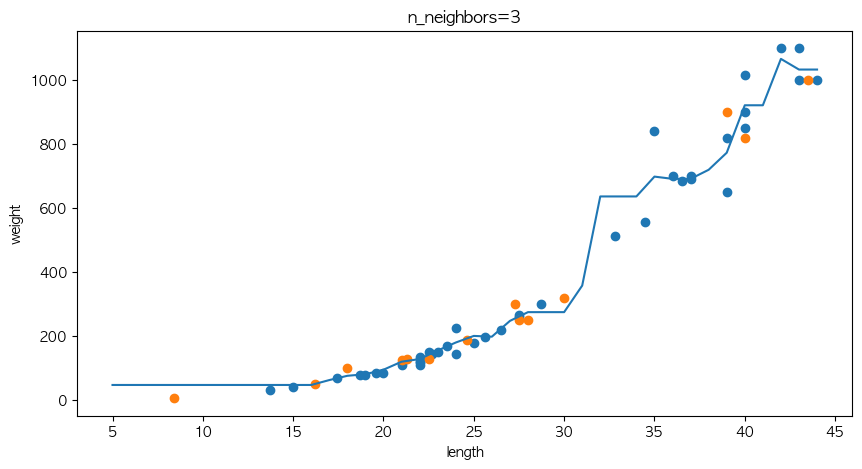

K ===> 5
Train Score : 0.9698823289099254
Test  Score : 0.992809406101064
----------------------------------------


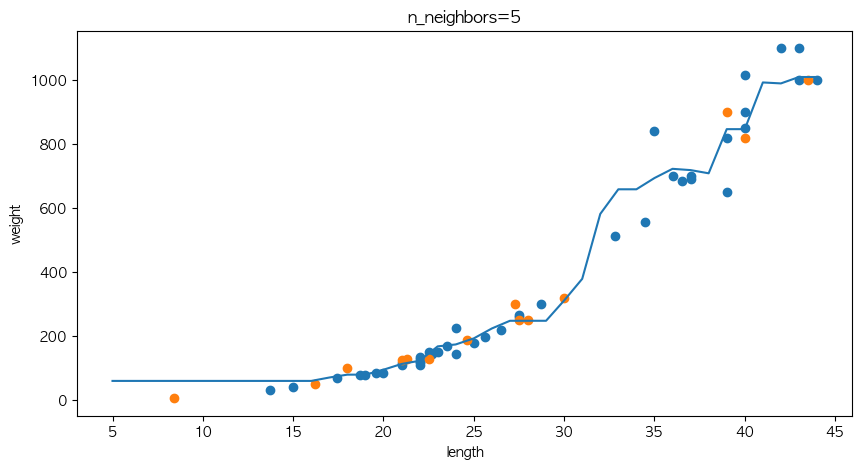

K ===> 10
Train Score : 0.96164569026043
Test  Score : 0.9737908255822255
----------------------------------------


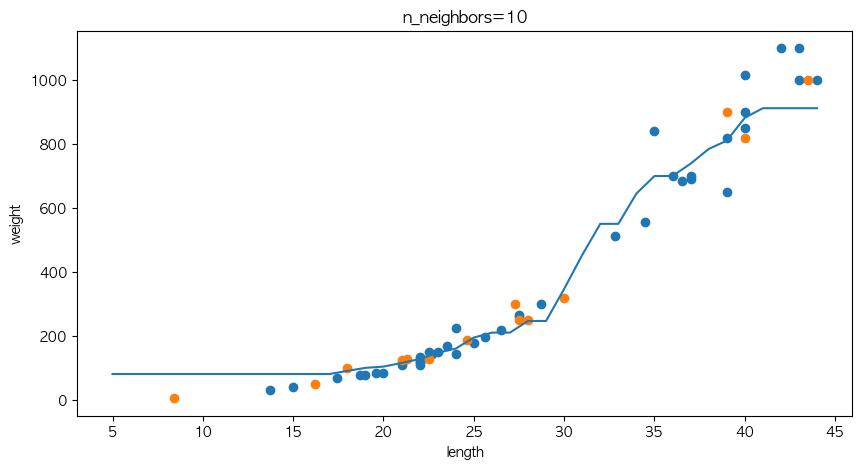

In [34]:
knr = KNeighborsRegressor()

# x좌표
x = np.arange(5,45).reshape(-1,1)

for n in [1,3,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print('K ===>',n)
    print("Train Score :", knr.score(train_input, train_target))
    print("Test  Score :", knr.score(test_input, test_target))
    print('-'*40)

    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련세트와 검증세트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(train_input,train_target)
    plt.scatter(test_input,test_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors=%d'%n)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()
